<a href="https://colab.research.google.com/github/RMNT/toai_d_class/blob/master/toai_class_d_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Analysis of World Happiness Report 2015-2020

World happiness report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors. 

The rankings of national happiness are based on a Cantril ladder survey. Nationally representative samples of respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The report correlates the results with various life factors.

In the reports, experts in fields including economics, psychology, survey analysis, and national statistics, describe how measurements of well-being can be used effectively to assess the progress of nations, and other topics. Each report is organized by chapters that delve deeper into issues relating to happiness, including mental illness, the objective benefits of happiness, the importance of ethics, policy implications, and links with the Organisation for Economic Co-operation and Development's (OECD) approach to measuring subjective well-being and other international and national efforts.

Hypothesis:
  * Happiest countries are in Northen Europe
  * Top 5 happiest countries are stable

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


##Imports

In [2]:
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

In [3]:
import pandas as pd
!pip install geopandas
!pip install python-varname
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colorbar as clr
from matplotlib.figure import Figure
import numpy as np
from functools import reduce
from varname import nameof
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import re

In [4]:
%cd 'drive/My Drive/World Happiness Report'

/content/drive/My Drive/World Happiness Report


## Importing data

In [5]:
whr_2015 = pd.read_csv('2015.csv')
whr_2016 = pd.read_csv('2016.csv')
whr_2017 = pd.read_csv('2017.csv')
whr_2018 = pd.read_csv('2018.csv')
whr_2019 = pd.read_csv('2019.csv')
whr_2020 = pd.read_csv('2020.csv')

country_bn = gpd.read_file('World_Countries__Generalized_.shx')

In [6]:
all_whr = [whr_2015, whr_2016, whr_2017, whr_2018, whr_2019, whr_2020]

## Functions

Contains snippets of code often used in the notebook and thus collected into one place.

In [7]:
def nan_number(dfs):
  nans = 0
  for df in dfs:
    nans = nans + len(df[df.isna().any(axis=1)])
  return nans


def delete_nans(dfs):
  for df in dfs:
    df.dropna(inplace=True)

def shortest_list(lists):
  shortest = len(lists[0])
  index = 0
  for ind, lst in enumerate(lists[1:]):
    if len(lst) < shortest:
      shortest = len(lst)
      index = ind
  return index


def elements_from_array(array, elements):
  repeating_columns = []
  for ind, num in enumerate(array):
    if num == 5:
      repeating_columns.append(elements[ind])
  return repeating_columns


def elements_in_all_lists(lists):
  ind = shortest_list(lists)
  repeating_columns_num = [0] * (len(lists[ind]))
  repeating_columns = []
  shortest = lists[ind]
  lists = lists[:ind] + lists[ind+1:]
  for ind, column in enumerate(shortest):
    for lst in lists:
      if column in lst:
        repeating_columns_num[ind] = repeating_columns_num[ind]+1
  repeating_columns = elements_from_array(repeating_columns_num, shortest)
  return repeating_columns


def not_needed_countries(geocountry, happiness_df):
  countries = []
  for country in geocountry.to_list():
    if country not in happiness_df:
      countries.append(country)
  return countries


def delete_rows(df, rows):
  for index, row in df.iterrows():
    if row.Country in rows:
      df.drop(index, inplace=True)
  df.reset_index(inplace=True)
  return df


def all_countries(dfs, col_name):
  countries = []
  for df in dfs:
    for iter, row in df.iterrows():
      if df.loc[iter, col_name] not in countries:
        countries.append(df.loc[iter, col_name])
  return countries


def leftout_countries(df, col_name, all_countries):
  unnoticed = []
  accepted_countries = df.loc[:, col_name].tolist()
  for country in all_countries:
    if country not in accepted_countries:
      unnoticed.append(country)
  return unnoticed


def add_color(df, color):
  df['Color'] = ""
  color = int(color.replace('#', '0x'), 16)
  print("color: " + str(color))
  for iter, row in df.iterrows():
    df.at[iter, 'Color'] = hex(color)
    color = color-5
  return df


def get_country_rows(dfs, country, columns):
  country_rows = pd.DataFrame(columns=columns)
  cnt = 0
  #whr = re.search("(whr_)\d+/g", txt)
  for  df in dfs:
    for iter, row in df.iterrows():
      if row['Country'] == country:
        country_rows.loc[cnt] = row
        cnt = cnt + 1
  return country_rows[columns]


def add_subplot(years, countries, col_name, type='plot', axis = None, invert=False, legend=False, title=None):
  ax = axis or plt.gca()
  for country in countries:
    if type == 'plot':
      ax.plot(years, countries[country][col_name], label=country)
    if type == 'bar':
      width = 0.35
      x = np.arange(len(country_name))
      cnt = x-width/x
      for name in country_name:
        ax.bar(cnt, country[col_name], width, label=name)
        cnt = cnt+width/x
  if invert:
      ax.invert_yaxis()
  if legend:
      ax.legend(loc='best')
  if title:
      ax.set_title(title)
  return (ax)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

## Data exploration

Number of rows in each dataframe:

In [8]:
print("2015: " + str(len(whr_2015)))
print("2016: " + str(len(whr_2016)))
print("2017: " + str(len(whr_2017)))
print("2018: " + str(len(whr_2018)))
print("2019: " + str(len(whr_2019)))
print("2020: " + str(len(whr_2020)))

2015: 158
2016: 157
2017: 155
2018: 156
2019: 156
2020: 153


In [9]:
print("2015: " + str(whr_2015.columns))
print("2016: " + str(whr_2016.columns))
print("2017: " + str(whr_2017.columns))
print("2018: " + str(whr_2018.columns))
print("2019: " + str(whr_2019.columns))
print("2020: " + str(whr_2020.columns))

2015: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017: Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018: Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life 

We can notice that across the years columns showing the same information are named differently. This will have to be changed later.

Now we will look how the dataframes themselves look like

In [10]:
whr_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [11]:
whr_2020

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [12]:
country_bn

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
1,2,United States Minor Outlying Islands,UM,United States,US,0.480216,0.003216,"MULTIPOLYGON (((-160.02114 -0.39805, -160.0281..."
2,3,Cook Islands,CK,New Zealand,NZ,0.980664,0.013073,"MULTIPOLYGON (((-159.74698 -21.25667, -159.793..."
3,4,French Polynesia,PF,France,FR,3.930211,0.175332,"MULTIPOLYGON (((-149.17920 -17.87084, -149.258..."
4,5,Niue,NU,New Zealand,NZ,0.541413,0.021414,"POLYGON ((-169.89389 -19.14556, -169.93088 -19..."
...,...,...,...,...,...,...,...,...
244,245,Northern Mariana Islands,MP,United States,US,0.908853,0.019927,"MULTIPOLYGON (((145.73468 15.08722, 145.72830 ..."
245,246,Palau,PW,Palau,PW,1.105323,0.031136,"MULTIPOLYGON (((134.53137 7.35444, 134.52234 7..."
246,247,Russian Federation,RU,Russian Federation,RU,1536.287150,2931.526082,"MULTIPOLYGON (((-179.99999 68.98010, -179.9580..."
247,248,Spain,ES,Spain,ES,51.724956,52.915449,"MULTIPOLYGON (((-2.91472 35.27361, -2.93924 35..."


There are several unneeded columns that will be deleted later.

Column types:

In [13]:
for whr in all_whr:
  print(whr.dtypes)
  print("")
print(country_bn.dtypes)

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
D

##Adding year columns

It is planned to use the dataframes in relation with years they describe, so I am adding the Year column

In [14]:
whr_2015['Year'] = 2015
whr_2016['Year'] = 2016
whr_2017['Year'] = 2017
whr_2018['Year'] = 2018
whr_2019['Year'] = 2019
whr_2020['Year'] = 2020

## Data cleaning

### Cleaning country boundaries dataframe

First, I am deleting unnecessary columns from the geo dataframe and leaving only names of the countries and their geometries

In [15]:
to_delete = ['FID', 'COUNTRYAFF', 'AFF_ISO', 'SHAPE_Leng', 'SHAPE_Area', 'ISO']
country_bn.drop(to_delete, axis=1, inplace=True)

In [16]:
country_bn

,COUNTRY,geometry
0,American Samoa,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
1,United States Minor Outlying Islands,"MULTIPOLYGON (((-160.02114 -0.39805, -160.0281..."
2,Cook Islands,"MULTIPOLYGON (((-159.74698 -21.25667, -159.793..."
3,French Polynesia,"MULTIPOLYGON (((-149.17920 -17.87084, -149.258..."
4,Niue,"POLYGON ((-169.89389 -19.14556, -169.93088 -19..."
...,...,...
244,Northern Mariana Islands,"MULTIPOLYGON (((145.73468 15.08722, 145.72830 ..."
245,Palau,"MULTIPOLYGON (((134.53137 7.35444, 134.52234 7..."
246,Russian Federation,"MULTIPOLYGON (((-179.99999 68.98010, -179.9580..."
247,Spain,"MULTIPOLYGON (((-2.91472 35.27361, -2.93924 35..."


### Renaming Columns

Second of all, I am unifying the column names of world happiness report dataframes

In [17]:
new_col_name = []
for col_name in whr_2017.columns:
  new_col_name.append(col_name.replace('.', ' '))
whr_2017.columns = new_col_name

whr_2017.rename(columns={'Economy  GDP per Capita ': 'Economy (GDP per Capita)'}, inplace=True)
whr_2017.rename(columns={'Health  Life Expectancy ': 'Health (Life Expectancy)'}, inplace=True)
whr_2017.rename(columns={'Trust  Government Corruption ': 'Trust (Government Corruption)'}, inplace=True)
whr_2018.rename(columns={'Country or region':'Country'}, inplace=True)
whr_2019.rename(columns={'Country or region':'Country'}, inplace=True)
whr_2018.rename(columns={'Overall rank':'Happiness Rank'}, inplace=True)
whr_2019.rename(columns={'Overall rank':'Happiness Rank'}, inplace=True)
whr_2018.rename(columns={'Score':'Happiness Score'}, inplace=True)
whr_2019.rename(columns={'Score':'Happiness Score'}, inplace=True)
whr_2018.rename(columns={'GDP per capita':'Economy (GDP per Capita)'}, inplace=True)
whr_2019.rename(columns={'GDP per capita':'Economy (GDP per Capita)'}, inplace=True)
whr_2018.rename(columns={'Healthy life expectancy':'Health (Life Expectancy)'}, inplace=True)
whr_2019.rename(columns={'Healthy life expectancy':'Health (Life Expectancy)'}, inplace=True)
whr_2018.rename(columns={'Freedom to make life choices':'Freedom'}, inplace=True)
whr_2019.rename(columns={'Freedom to make life choices':'Freedom'}, inplace=True)
whr_2018.rename(columns={'Perceptions of corruption':'Trust (Government Corruption)'}, inplace=True)
whr_2019.rename(columns={'Perceptions of corruption':'Trust (Government Corruption)'}, inplace=True)
whr_2020.rename(columns={'Country name':'Country'}, inplace=True)
whr_2020.rename(columns={'Dystopia + residual':'Dystopia Residual'}, inplace=True)
whr_2020.rename(columns={'Healthy life expectancy':'Health (Life Expectancy)'}, inplace=True)
whr_2020.rename(columns={'Freedom to make life choices':'Freedom'}, inplace=True)
whr_2020.rename(columns={'Perceptions of corruption':'Trust (Government Corruption)'}, inplace=True)
whr_2020.rename(columns={'Logged GDP per capita':'Economy (GDP per Capita)'}, inplace=True)
whr_2020.rename(columns={'Standard error of ladder score':'Standard Error'}, inplace=True)
whr_2020.rename(columns={'COuntry Name':'Country'}, inplace=True)
whr_2020['Happiness Rank'] = whr_2020.index + 1

country_bn.rename(columns={'COUNTRY': 'Country'}, inplace=True)

In [18]:
country_bn

,Country,geometry
0,American Samoa,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
1,United States Minor Outlying Islands,"MULTIPOLYGON (((-160.02114 -0.39805, -160.0281..."
2,Cook Islands,"MULTIPOLYGON (((-159.74698 -21.25667, -159.793..."
3,French Polynesia,"MULTIPOLYGON (((-149.17920 -17.87084, -149.258..."
4,Niue,"POLYGON ((-169.89389 -19.14556, -169.93088 -19..."
...,...,...
244,Northern Mariana Islands,"MULTIPOLYGON (((145.73468 15.08722, 145.72830 ..."
245,Palau,"MULTIPOLYGON (((134.53137 7.35444, 134.52234 7..."
246,Russian Federation,"MULTIPOLYGON (((-179.99999 68.98010, -179.9580..."
247,Spain,"MULTIPOLYGON (((-2.91472 35.27361, -2.93924 35..."


In [19]:
print("2015: " + str(whr_2015.columns))
print("2016: " + str(whr_2016.columns))
print("2017: " + str(whr_2017.columns))
print("2018: " + str(whr_2018.columns))
print("2019: " + str(whr_2019.columns))
print("2020: " + str(whr_2020.columns))

2015: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')
2016: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')
2017: Index(['Country', 'Happiness Rank', 'Happiness Score', 'Whisker high',
       'Whisker low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual', 'Year'],
      dtype='object')
2018: Index(['Happiness Rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita

We create list of lists of world happiness report dataframes columns

In [20]:
all_whr_columns = []
for whr in all_whr:
  all_whr_columns.append(list(whr.columns))

In [21]:
column = elements_in_all_lists(all_whr_columns)
country_happiness_rank = ['Country', 'Happiness Rank', 'Year']
column

['Country',
 'Happiness Rank',
 'Economy (GDP per Capita)',
 'Health (Life Expectancy)',
 'Freedom',
 'Generosity',
 'Trust (Government Corruption)',
 'Year']

## Plotting

### Comparing features of 2015

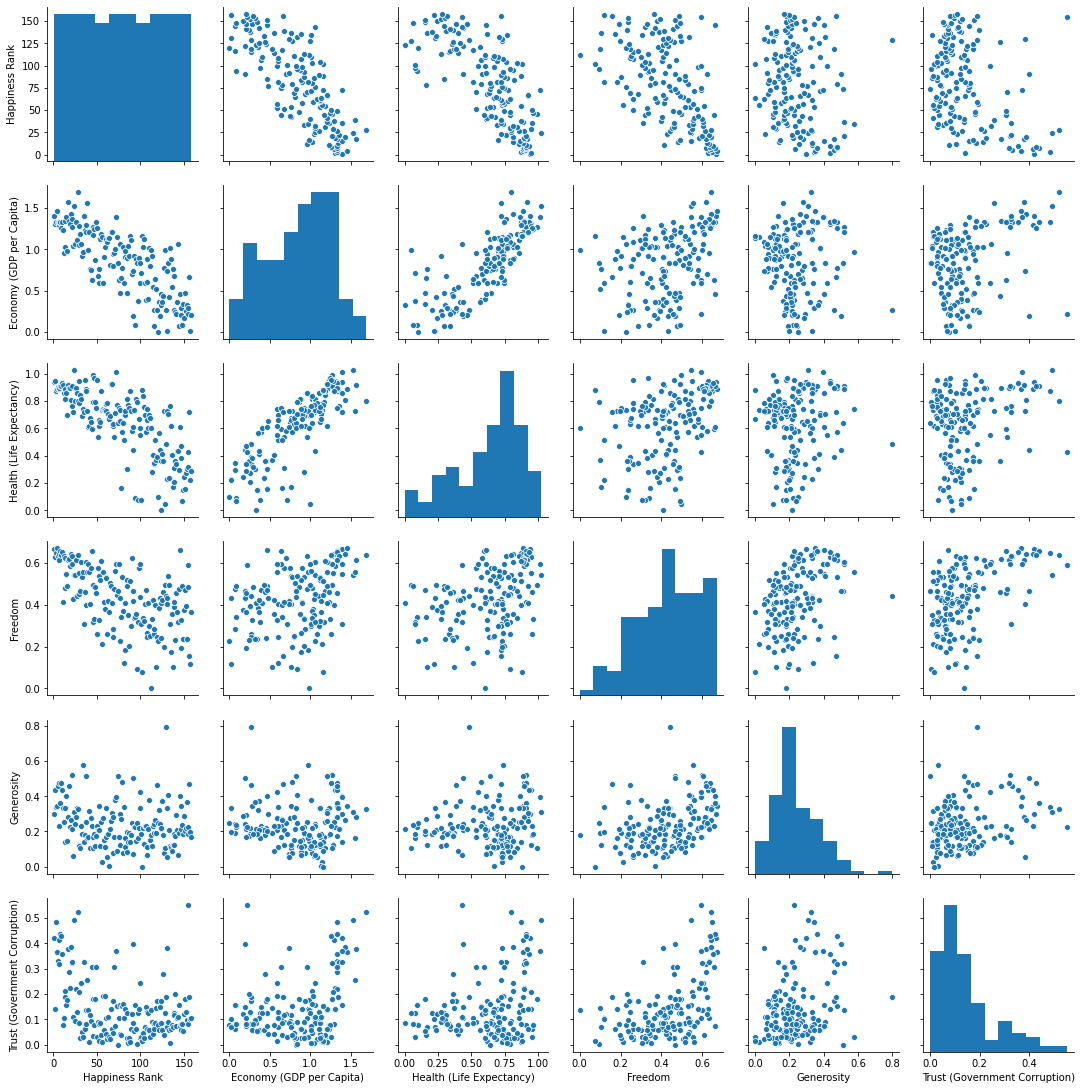

In [22]:
sns.pairplot(whr_2015[column].drop('Year', axis=1))

The clearest correlations between features can be seen between:
> Linearly: Health vs Economy, Trust vs Economy, Generosity vs Economy

> Monotonicaly: Trust vs Freedom and Generosity vs Freedom

All features have relation with the Happiness rank


''

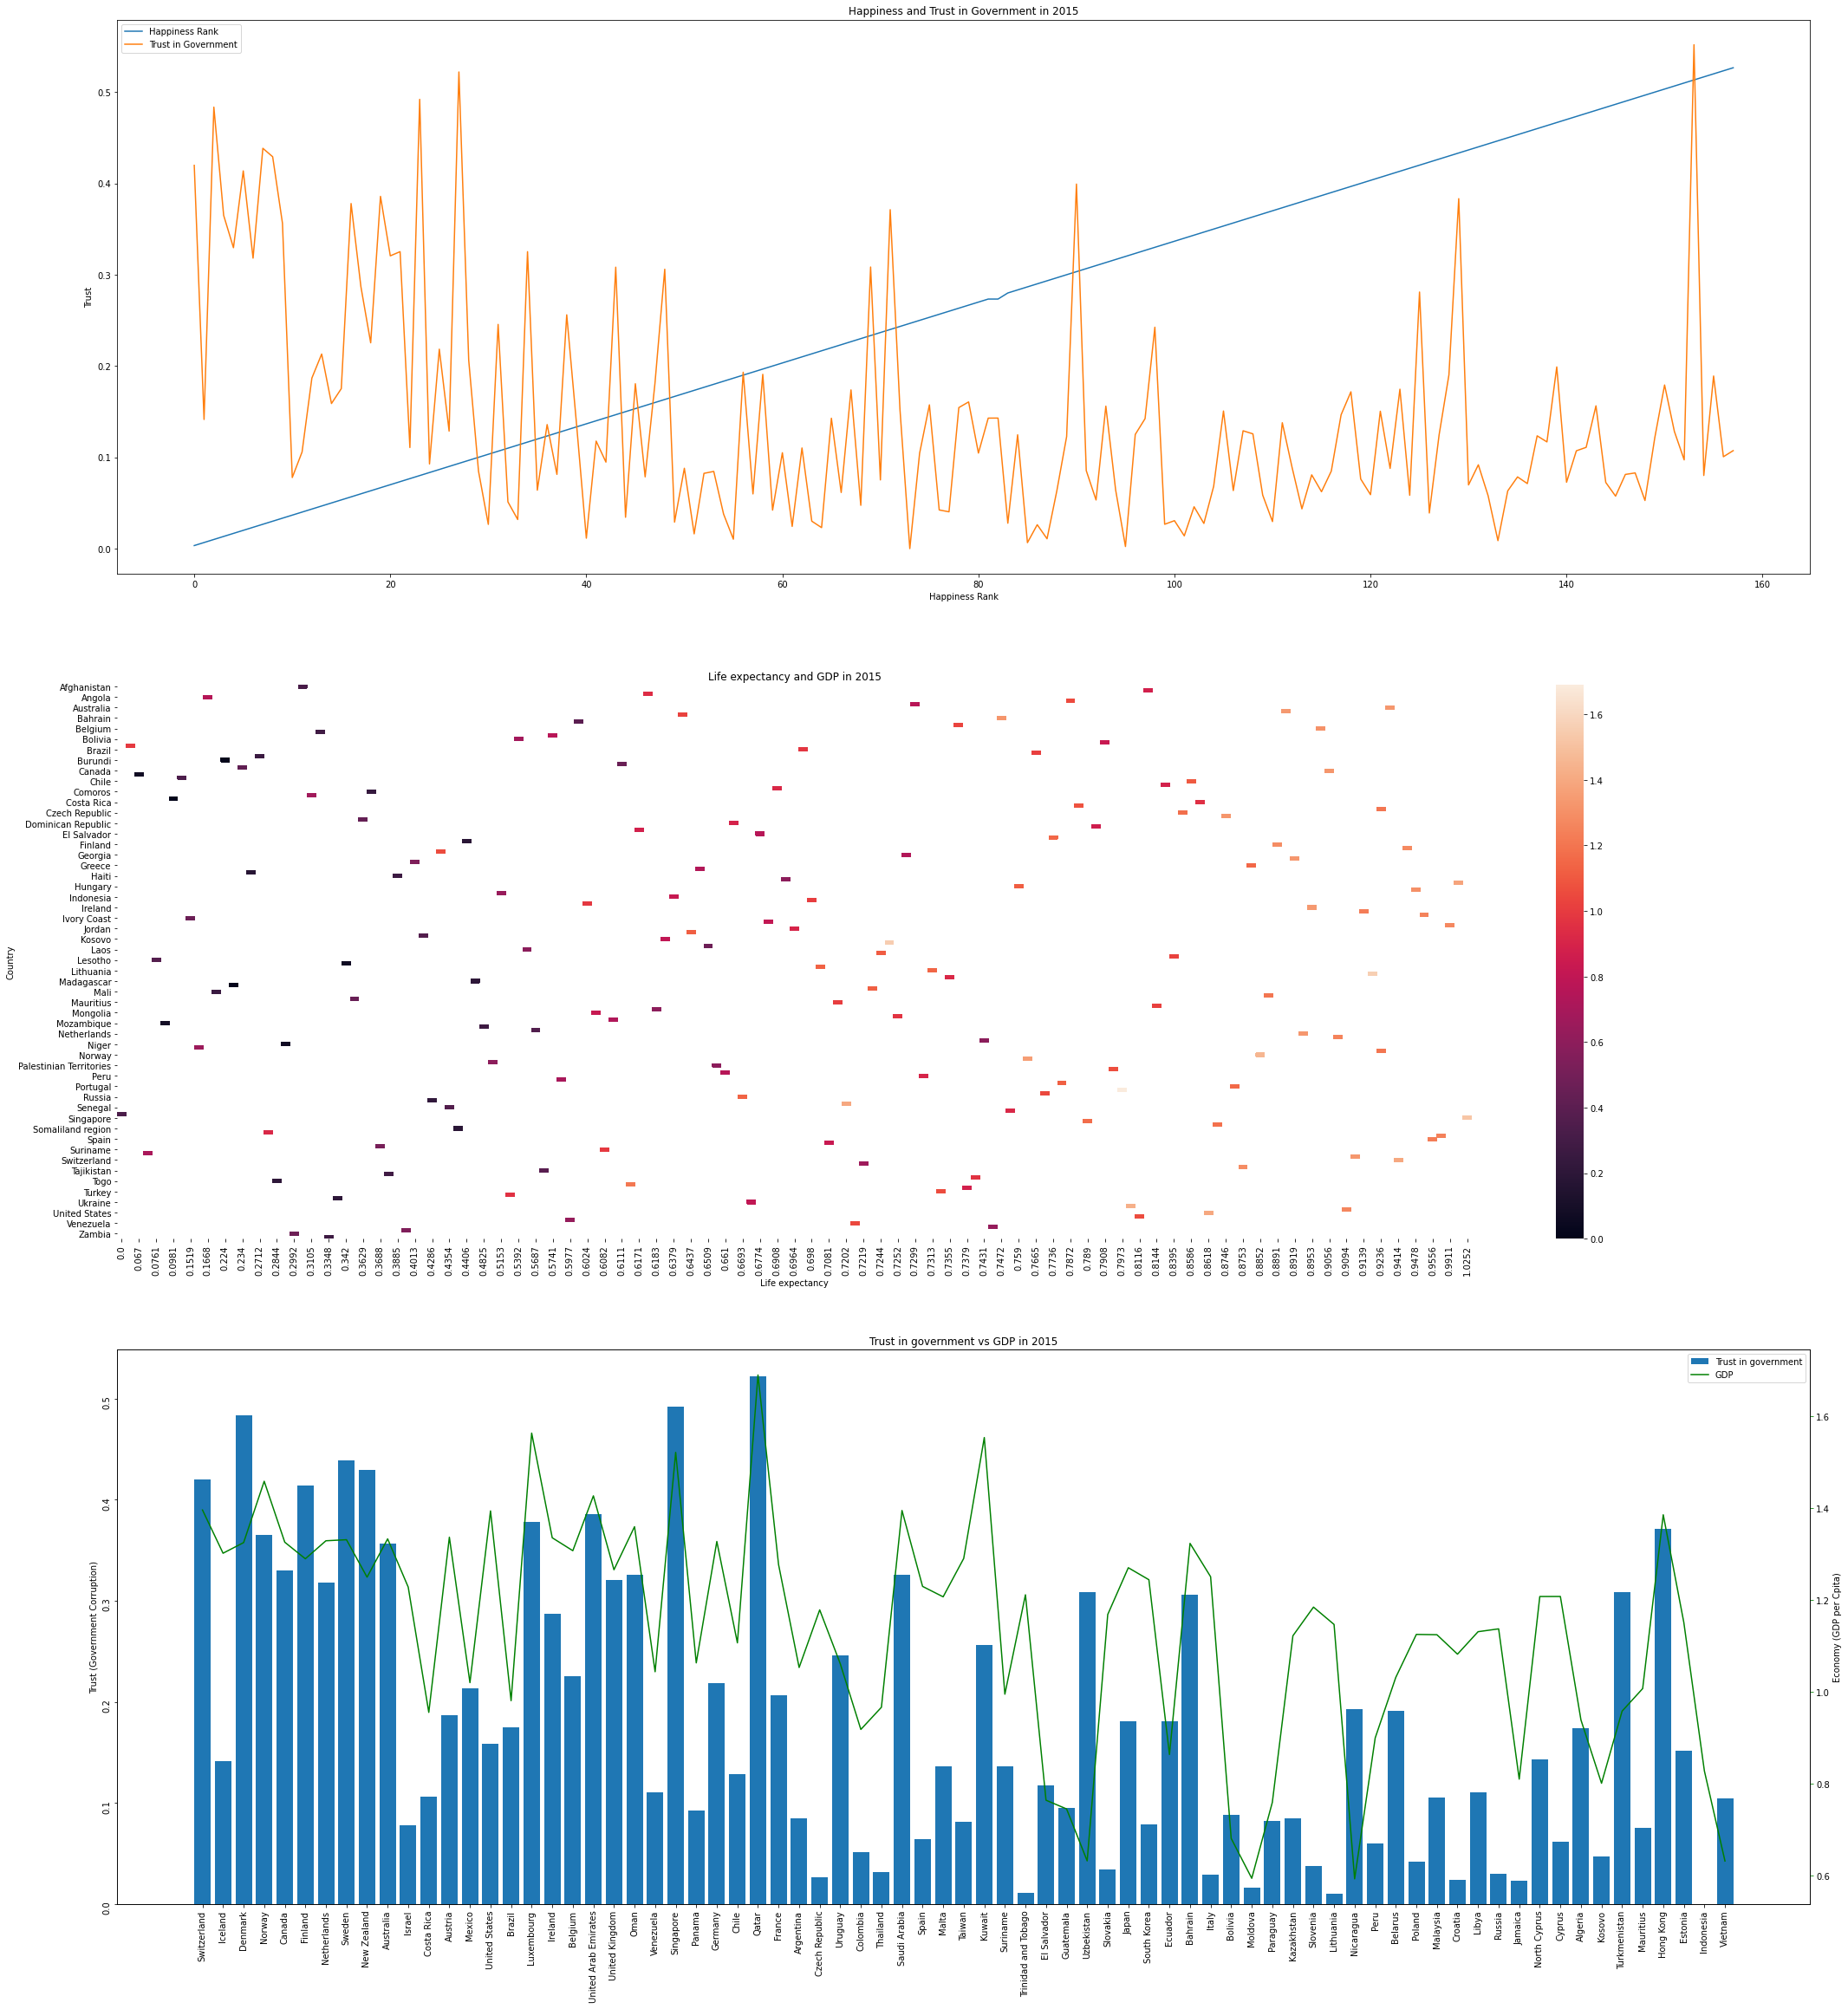

In [23]:
fig, ax = plt.subplots(3, figsize=(35,40))
ax[0].plot(whr_2015['Happiness Rank']/300, label='Happiness Rank')
ax[0].plot(whr_2015['Trust (Government Corruption)'], label='Trust in Government')
ax[0].legend()
ax[0].set_title("Happiness and Trust in Government in 2015")
ax[0].set_xlabel('Happiness Rank')
ax[0].set_ylabel('Trust')

data_1 = whr_2015.pivot('Country', 'Health (Life Expectancy)', 'Economy (GDP per Capita)')
new_col_names = []
for col_name in data_1.columns:
  new_col_names.append(np.round(col_name, 4))
data_1.columns = new_col_names
sns.heatmap(data_1, ax=ax[1])
ax[1].set_title('Life expectancy and GDP in 2015')
ax[1].set_xlabel('Life expectancy')

trust = ax[2].bar(x=whr_2015['Country'][:75], height=whr_2015['Trust (Government Corruption)'][:75], label='Trust in government')
ax[2].set_ylabel('Trust (Government Corruption)')
ax2 = ax[2].twinx()
gdp = ax2.plot(whr_2015['Economy (GDP per Capita)'][:75], color='green', label='GDP')
ax2.tick_params(axis='y', color='green')
ax2.set_ylabel('Economy (GDP per Cpita)')
ax[2].tick_params(rotation=90)
lns = [trust]+gdp
labs = [l.get_label() for l in lns]
ax[2].legend(lns, labs)
ax[2].set_title('Trust in government vs GDP in 2015')

for a in fig.axes:
    a.tick_params(
    axis='x',           
    which='both',       
    bottom=True,
    top=False,
    labelbottom=True)    # labels along the bottom edge are on
;
#whr_2015['Trust (Government Corruption)'].plot.density(ax=ax[3]);

### Happiness changes of top 10 countries

In [24]:
final_df = whr_2015.append([whr_2016, whr_2017, whr_2018, whr_2019, whr_2020], ignore_index=True)[column].copy()
happiness_rank_year = final_df[['Country', 'Happiness Rank', 'Year']]
happiness_rank_year

,Country,Happiness Rank,Year
0,Switzerland,1,2015
1,Iceland,2,2015
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015
...,...,...,...
930,Central African Republic,149,2020
931,Rwanda,150,2020
932,Zimbabwe,151,2020
933,South Sudan,152,2020


In [25]:
group_countries = final_df.groupby(['Country'])
top_countries = whr_2015.Country[:10].tolist()

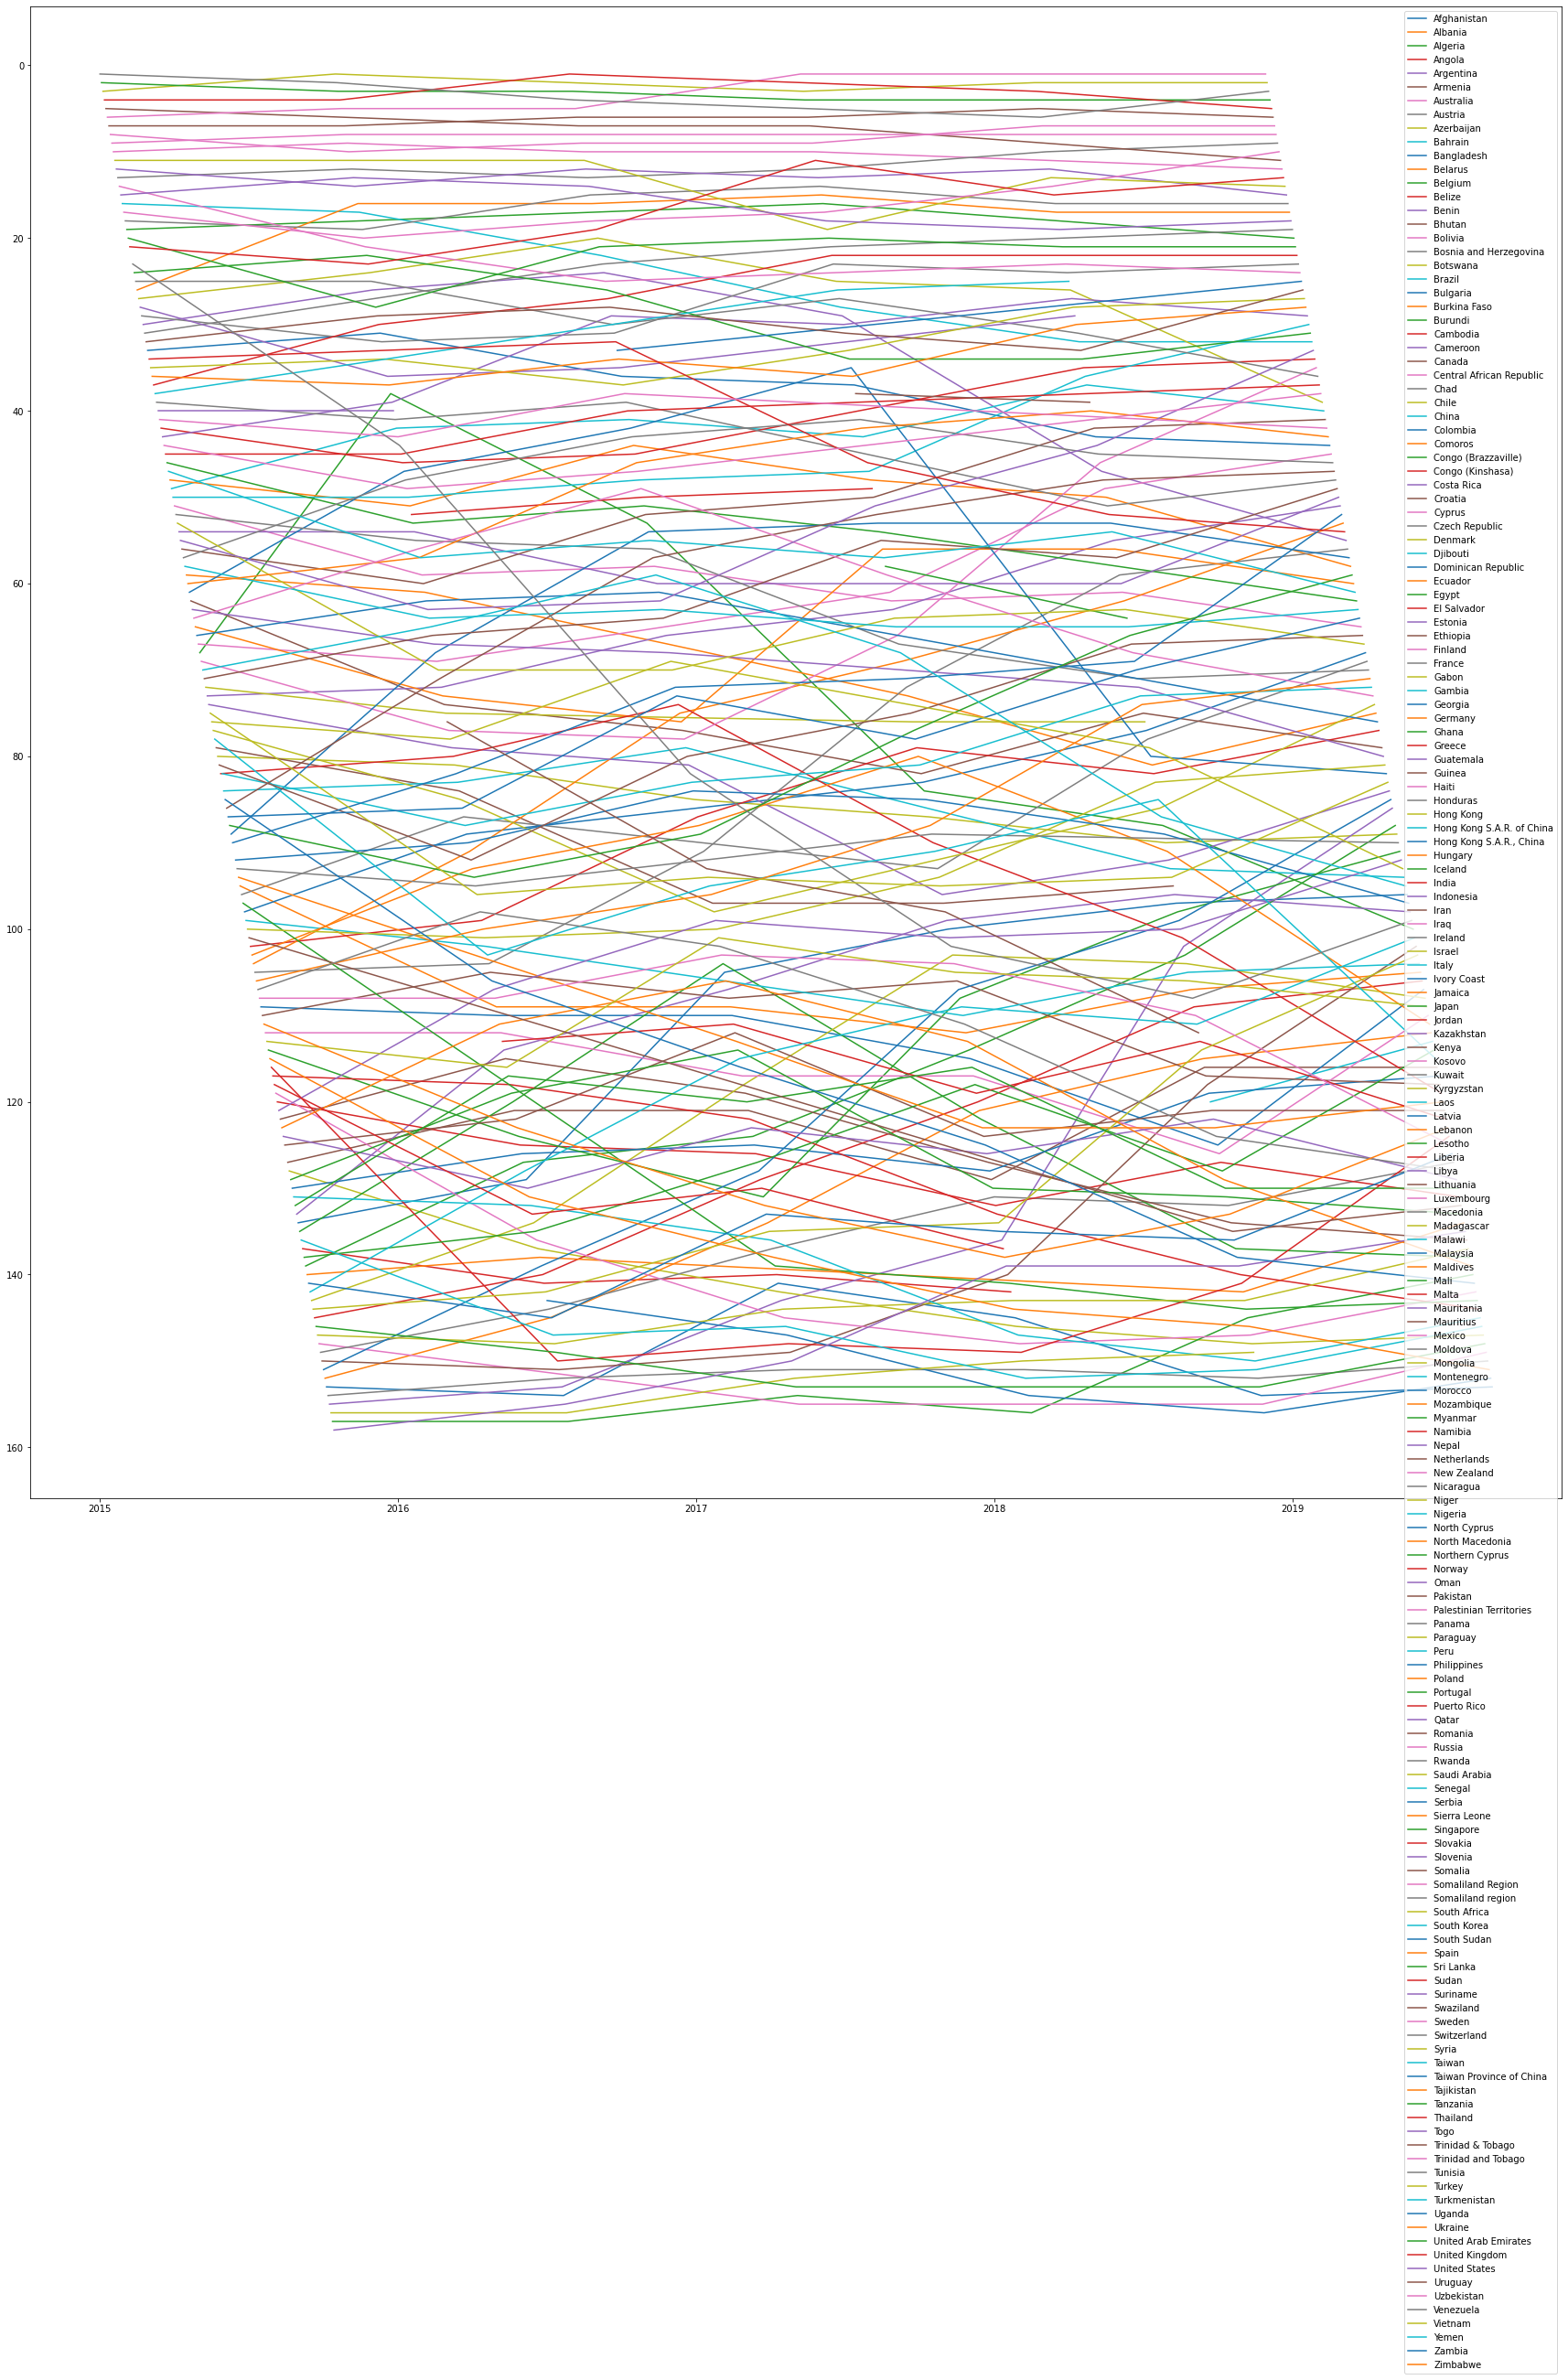

In [26]:
fig, ax = plt.subplots(1, figsize=(15, 9))
final_df.groupby('Country')['Happiness Rank'].plot(legend=True, x='Date', figsize=(30, 30), ax=ax)
plt.gca().invert_yaxis()
plt.locator_params(axis='x', nbins=7)
ax.set_xticklabels([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]);

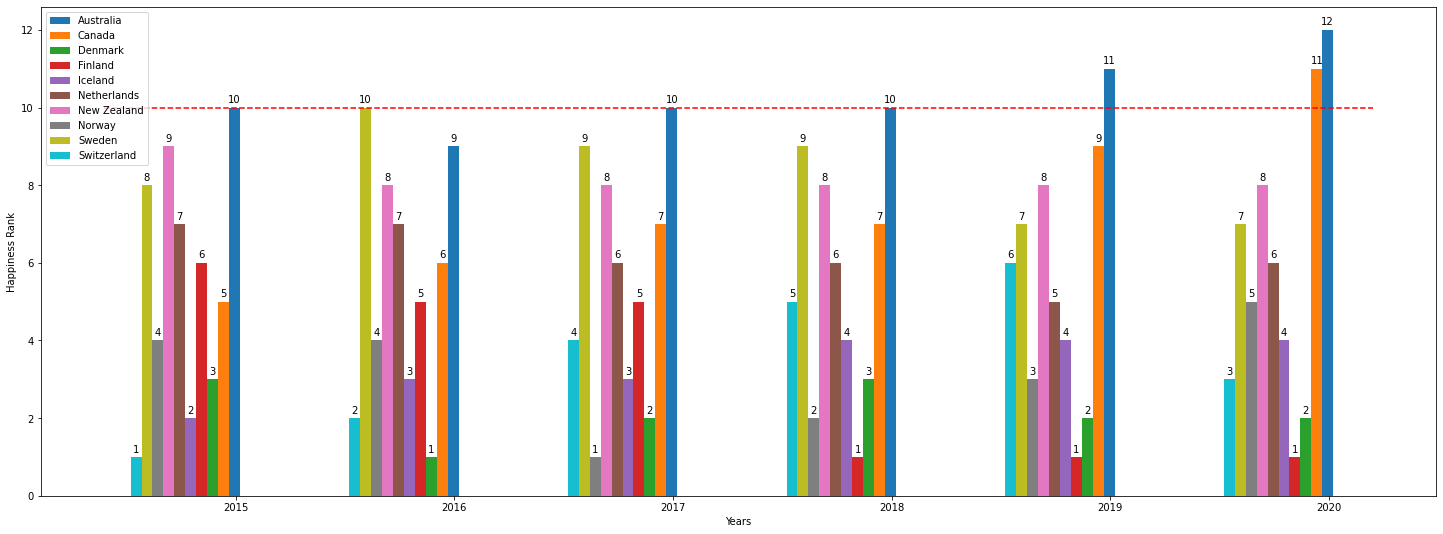

In [27]:
fig, ax = plt.subplots(1, figsize=(25, 9))
top = pd.DataFrame(columns=['Country', 'Happiness Rank', 'Year'])
for name in top_countries:
  top = top.append(get_country_rows(all_whr, name, column))

plotting_data = top.groupby('Country')
x = np.arange(6)
width = 0.05
number = len(top_countries)
subtract = width/number
for country, group in plotting_data:
  happiness = group['Happiness Rank'].tolist()
  autolabel(ax.bar(x - subtract, happiness, width, label=country))
  subtract = subtract + width
ax.set_xlabel('Years')
ax.set_ylabel('Happiness Rank')
plt.hlines(10, xmin=-0.6, xmax=5.2, color='red', linestyles='dashed')
plt.locator_params(axis='x', nbins=7)
ax.set_xticklabels([2014, 2015, 2016, 2017, 2018, 2019, 2020])
ax.legend();

We can see that two out of ten countries (Australia and Canada) left the top 10 happiest contries. Australia does it in 2019 and Canada - in 2020

### Comparing countries of various Europe regions

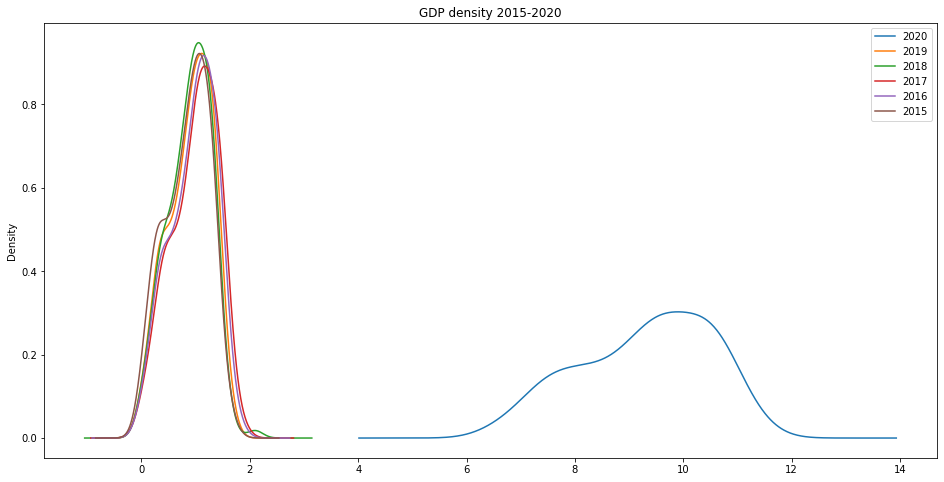

In [28]:
fig, ax = plt.subplots(1, figsize=(16,8))
whr_2020['Economy (GDP per Capita)'].plot.density(ax=ax, label=2020)
whr_2019['Economy (GDP per Capita)'].plot.density(ax=ax, label=2019)
whr_2018['Economy (GDP per Capita)'].plot.density(ax=ax, label=2018)
whr_2017['Economy (GDP per Capita)'].plot.density(ax=ax, label=2017)
whr_2016['Economy (GDP per Capita)'].plot.density(ax=ax, label=2016)
whr_2015['Economy (GDP per Capita)'].plot.density(ax=ax, label=2015)
ax.legend()
ax.set_title('GDP density 2015-2020');

In [29]:
whr_lt = get_country_rows(all_whr, 'Lithuania', column)[:-1]
whr_ger = get_country_rows(all_whr, 'Germany', column)[:-1]
whr_lv = get_country_rows(all_whr, 'Latvia', column)[:-1]
whr_es = get_country_rows(all_whr, 'Estonia', column)[:-1]
whr_fr = get_country_rows(all_whr, 'France', column)[:-1]
whr_bel = get_country_rows(all_whr, 'Belgium', column)[:-1]
whr_ne = get_country_rows(all_whr, 'Netherlands', column)[:-1]

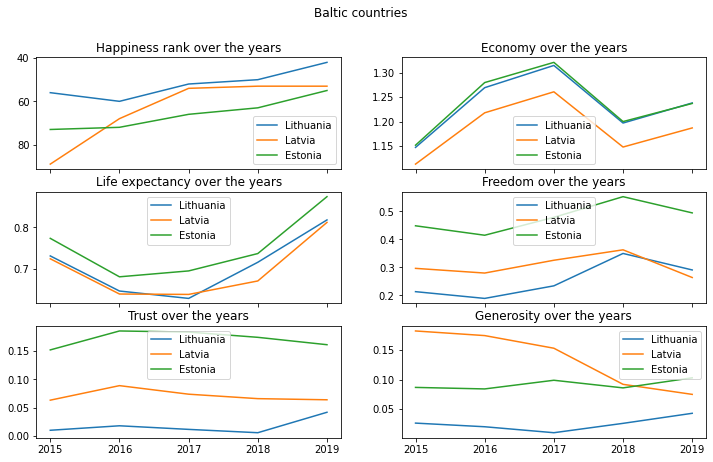

In [30]:
years = whr_lt['Year']
cmp_countries = {'Lithuania': whr_lt, 'Latvia': whr_lv, 'Estonia': whr_es}
fig, ax = plt.subplots(3, 2, figsize=(12, 7), sharex=True)
fig.suptitle('Baltic countries')
plt.xticks(np.arange(2015, 2020, step=1.0))
add_subplot(years, cmp_countries, 'Happiness Rank', axis=ax[0,0], invert=True, legend=True, title='Happiness rank over the years')
add_subplot(years, cmp_countries, 'Economy (GDP per Capita)', axis=ax[0,1], legend=True, title='Economy over the years')
add_subplot(years, cmp_countries, 'Health (Life Expectancy)', axis=ax[1,0], legend=True, title='Life expectancy over the years')
add_subplot(years, cmp_countries, 'Freedom', axis=ax[1,1], legend=True, title='Freedom over the years')
add_subplot(years, cmp_countries, 'Trust (Government Corruption)', axis=ax[2,0], legend=True, title='Trust over the years')
add_subplot(years, cmp_countries, 'Generosity', axis=ax[2,1], legend=True, title='Generosity over the years');

Here we notice a strange phenomenon. Lithuania ranks second in economy, life expectancy among the Baltic countries and third in the rest of the features (Freedom, Trust in government and generosity). No matter that Lithuania is still the happiest Baltic country.

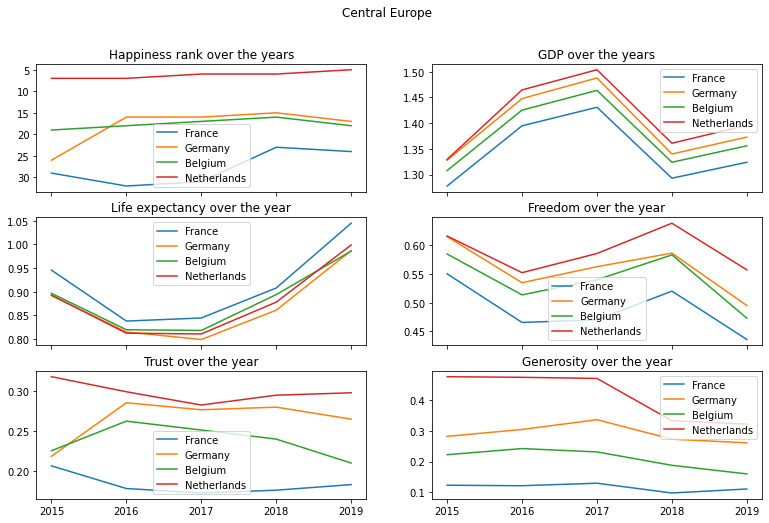

In [31]:
cmp_countries = {'France': whr_fr, 'Germany': whr_ger, 'Belgium': whr_bel, 'Netherlands': whr_ne}
years = whr_lt['Year'].tolist()
fig, ax = plt.subplots(3, 2, figsize=(13, 8), sharex=True)
fig.suptitle('Central Europe')
plt.xticks(np.arange(2015, 2020, step=1.0))
add_subplot(years, cmp_countries, 'Happiness Rank', invert=True, axis=ax[0,0], legend=True, title='Happiness rank over the years')
add_subplot(years, cmp_countries, 'Economy (GDP per Capita)', axis=ax[0,1], legend=True, title='GDP over the years')
add_subplot(years, cmp_countries, 'Health (Life Expectancy)',axis=ax[1,0], legend=True, title='Life expectancy over the year')
add_subplot(years, cmp_countries, 'Freedom', axis=ax[1, 1], legend=True, title='Freedom over the year')
add_subplot(years, cmp_countries, 'Trust (Government Corruption)', axis=ax[2,0], legend=True, title='Trust over the year')
add_subplot(years, cmp_countries, 'Generosity', axis=ax[2,1], legend=True, title='Generosity over the year');

No such a phenomenon can be seen in countries of central Europe. There the happiest country - Netherlands, also tops GDP, freedom, trust in government and generosity. Life expectancy is the only feature in which Netherlands scores third. 

### Country GDP anomalies to happiness rank

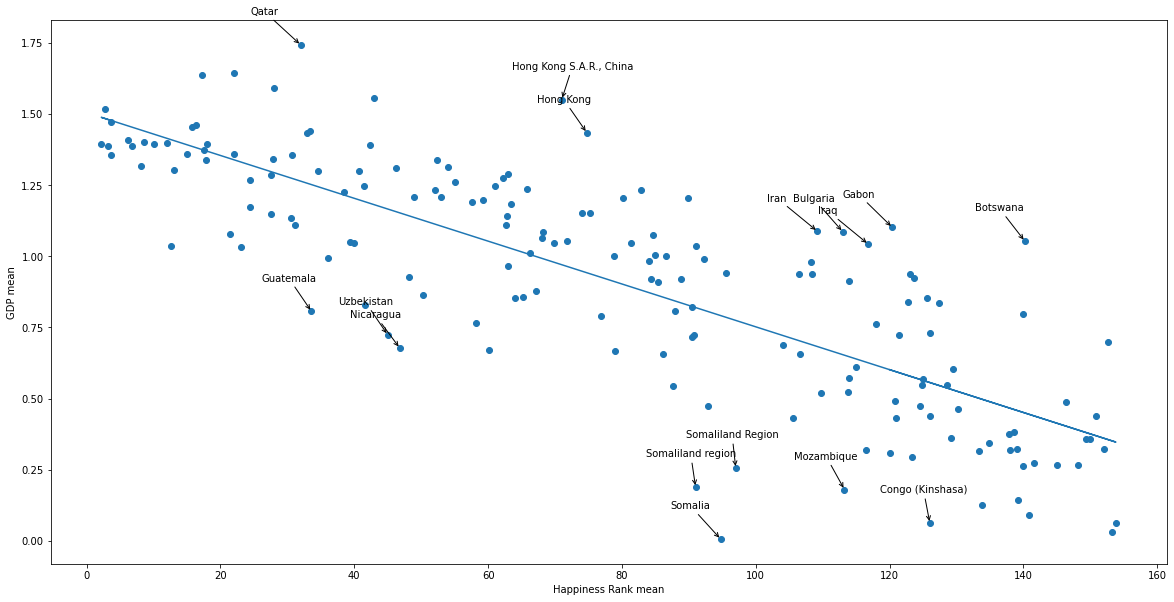

In [32]:
fig, ax = plt.subplots(1, figsize=(20,10))

country_means = pd.DataFrame(columns=('Country', 'Happiness Rank mean', 'GDP mean'))
country_means['Country'] = final_df['Country'].unique()
final_df_no_2020 = final_df[final_df['Year'] != 2020]

for ind, row in country_means.iterrows():
  row['GDP mean'] = final_df_no_2020.loc[final_df_no_2020['Country'] == row['Country']]['Economy (GDP per Capita)'].mean()
  row['Happiness Rank mean'] = final_df_no_2020.loc[final_df_no_2020['Country'] == row['Country']]['Happiness Rank'].mean()

country_means.dropna(inplace=True)

ax.scatter(x=country_means['Happiness Rank mean'], y=country_means['GDP mean'])
ax.set_xlabel('Happiness Rank mean')
ax.set_ylabel('GDP mean')
country_means['Happiness Rank mean'] = pd.to_numeric(country_means['Happiness Rank mean'])
country_means['GDP mean'] = pd.to_numeric(country_means['GDP mean'])
x = country_means['Happiness Rank mean'].tolist()
p = np.poly1d(np.polyfit(country_means['Happiness Rank mean'].tolist(), country_means['GDP mean'].tolist(), 1))
ax.plot(x, p(country_means['Happiness Rank mean']))
for ind, row in country_means.iterrows():
  y_lower_cond = country_means.iloc[ind]['GDP mean'] <= (p(country_means.iloc[ind]['Happiness Rank mean'])-0.4)
  y_upper_cond = country_means.iloc[ind]['GDP mean'] >= (p(country_means.iloc[ind]['Happiness Rank mean'])+0.4)
  if (y_lower_cond) or (y_upper_cond):
    ax.annotate(country_means.iloc[ind]['Country'], xy=(country_means.iloc[ind]['Happiness Rank mean'], country_means.iloc[ind]['GDP mean']), xytext=(-50, 30), textcoords='offset points', arrowprops=dict(arrowstyle="->"))
'''y_err = np.array(x).std() * np.sqrt(1/len(x) + (x - np.array(x).mean())**2 / np.sum((x - np.array(x).mean())**2))
y_err = y_err/10
ax.fill_between(x, p(country_means['Happiness Rank mean']) - y_err, p(country_means['Happiness Rank mean']) + y_err, alpha=0.2) ''';

### Joining the dataframes with shapefile

In [33]:
all_whr_countries = all_countries(all_whr, 'Country')
print("There are {} unique countries across all the dataframes".format(len(all_whr_countries)))

There are 172 unique countries across all the dataframes


In [34]:
no_happiness_rank = not_needed_countries(country_bn.Country, all_whr_countries)
print("{} ({:0.3f}%) countries in country boundaries dataframe don't have any happiness rank data".format(len(no_happiness_rank), len(no_happiness_rank)/len(country_bn)))

95 (0.382%) countries in country boundaries dataframe don't have any happiness rank data


In [35]:
print(len(country_bn))

249


In [36]:
countries_no_boundaries = leftout_countries(country_bn, 'Country', all_whr_countries)
countries_no_boundaries

['Taiwan',
 'Russia',
 'North Cyprus',
 'Kosovo',
 'Hong Kong',
 'Somaliland region',
 'Macedonia',
 'Swaziland',
 'Palestinian Territories',
 'Congo (Kinshasa)',
 'Congo (Brazzaville)',
 'Ivory Coast',
 'Somaliland Region',
 'Taiwan Province of China',
 'Hong Kong S.A.R., China',
 'Trinidad & Tobago',
 'Northern Cyprus',
 'Hong Kong S.A.R. of China']

In [37]:
for whr in all_whr:
  whr.replace('Congo (Kinshasa)','Congo DRC', inplace=True)
  whr.replace('Congo (Brazzaville)', 'Congo', inplace=True)
  whr.replace('Palestinian Territories', 'Palestinian Territory', inplace=True)
  whr.replace('Trinidad & Tobago', 'Trinidad and Tobago', inplace=True)
  whr.replace('Somaliland region', 'Somaliland Region', inplace=True)
  whr.replace('Somaliland Region', 'Somaliland region', inplace=True)
  whr.replace('Russia', 'Russian Federation', inplace=True)

In [38]:
all_whr_countries = all_countries(all_whr, 'Country')

In [39]:
no_happiness_rank = not_needed_countries(country_bn.Country, all_whr_countries)
print("{} ({:0.3f}%) countries in country boundaries dataframe don't have any happiness rank data".format(len(no_happiness_rank), len(no_happiness_rank)/len(country_bn)))

91 (0.365%) countries in country boundaries dataframe don't have any happiness rank data


In [40]:
country_bn = delete_rows(country_bn, no_happiness_rank)

In [41]:
leftout_countries(country_bn, 'Country', all_whr_countries)

['Taiwan',
 'North Cyprus',
 'Kosovo',
 'Hong Kong',
 'Somaliland region',
 'Macedonia',
 'Swaziland',
 'Ivory Coast',
 'Taiwan Province of China',
 'Hong Kong S.A.R., China',
 'Northern Cyprus',
 'Hong Kong S.A.R. of China']

### Drawing the map

In [42]:
country_happiness_mean = pd.DataFrame(happiness_rank_year[['Country', 'Happiness Rank']].groupby('Country', as_index=False).mean())

In [55]:
get_country_rows(all_whr, 'Russian Federation', column)

,Country,Happiness Rank,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,Russian Federation,64,1.137640,0.669260,0.366790,0.001990,0.030050,2015
1,Russian Federation,56,1.232280,0.589910,0.326820,0.027360,0.035860,2016
2,Russian Federation,49,1.281778,0.547349,0.373783,0.052264,0.032963,2017
3,Russian Federation,59,1.151000,0.599000,0.399000,0.065000,0.025000,2018
4,Russian Federation,68,1.183000,0.726000,0.334000,0.082000,0.031000,2019
5,Russian Federation,73,10.128872,64.100456,0.729893,-0.151154,0.864803,2020


In [56]:
country_bn.loc[country_bn['Country'] == 'Russian Federation']

,index,Country,geometry
156,246,Russian Federation,"MULTIPOLYGON (((-179.99999 68.98010, -179.9580..."


In [60]:
final_df = whr_2015.append([whr_2016, whr_2017, whr_2018, whr_2019, whr_2020], ignore_index=True)[column].copy()
happiness_rank_year = final_df[['Country', 'Happiness Rank', 'Year']]

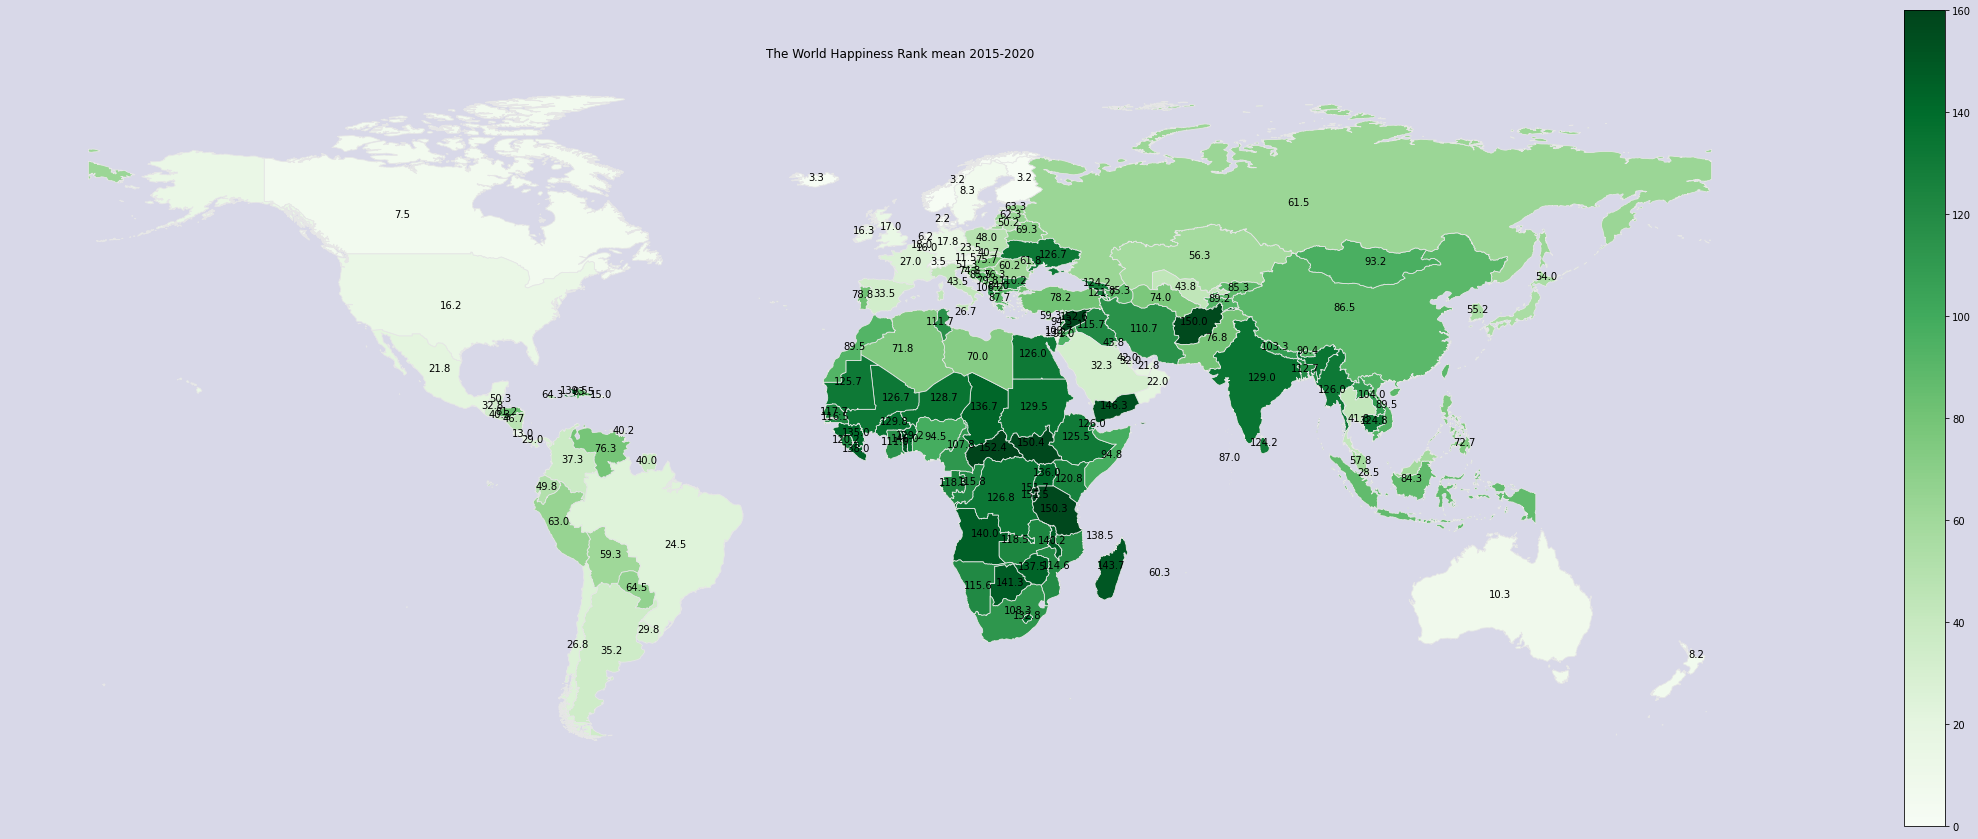

In [61]:
fig, ax = plt.subplots(1, figsize=(40, 15), facecolor='#D8D8E8')
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=0, vmax=160))
fig.colorbar(sm)

country_happiness_mean = pd.DataFrame(happiness_rank_year[['Country', 'Happiness Rank']].groupby('Country', as_index=False).mean())
countries = gpd.GeoDataFrame(country_happiness_mean.merge(country_bn, on='Country'))

countries.plot(figsize=(30,30), cmap='Greens', ax=ax, linewidth=0.8, edgecolor='0.9', column='Happiness Rank')

ax.set_title('The World Happiness Rank mean 2015-2020')
countries['coords'] = countries['geometry'].apply(lambda x: x.representative_point().coords[:])
countries['coords'] = [coords[0] for coords in countries['coords']]
for idx, row in countries.iterrows():
    plt.annotate(s=np.round(row['Happiness Rank'],1), xy=row['coords'],horizontalalignment='center', fontsize=10);

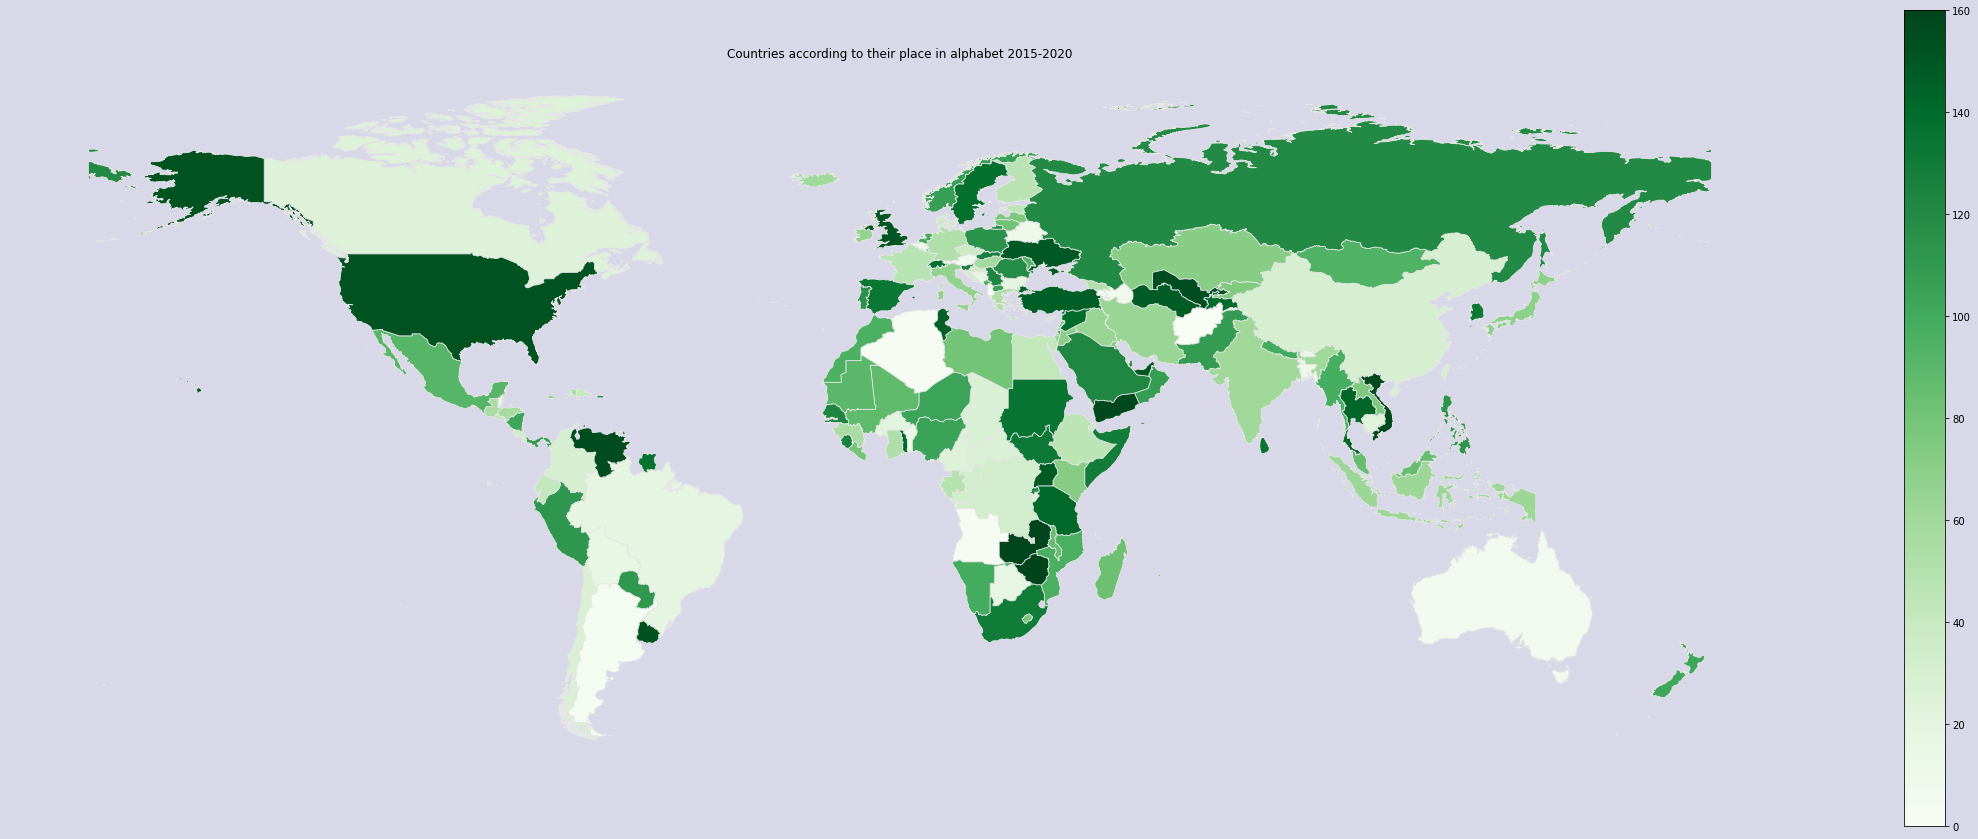

In [62]:
fig, ax = plt.subplots(1, figsize=(40, 15), facecolor='#D8D8E8')
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=0, vmax=160))
fig.colorbar(sm)

country_happiness_mean = pd.DataFrame(happiness_rank_year[['Country', 'Happiness Rank']].groupby('Country', as_index=False).mean())
countries = gpd.GeoDataFrame(country_happiness_mean.merge(country_bn, on='Country'))

countries.plot(figsize=(30,30), cmap='Greens', ax=ax, linewidth=0.8, edgecolor='0.9', column='Country')

ax.set_title('Countries according to their place in alphabet 2015-2020')
countries['coords'] = countries['geometry'].apply(lambda x: x.representative_point().coords[:])
countries['coords'] = [coords[0] for coords in countries['coords']];

Conclusions and observations:
  * the happiest countries are in Europe and North and South America
  * In 6 years top 8 countries have been stable, that is, have not left the boundaries
  * No matter the fact that Lithuania is second to last in Economy, Health, Freedom, Generosity, Trust in government it is still the happiest Baltic country
  * Such tendencies are not noticable in the countries of central Europe
  * Some ways of visualizing data are better for certain situations that others
  * Several countries in West Africa forming a line starts with letters at the second part of the alphabet